# Bank Loan Analysis

#### Thus, here is my second task: Perform a hypothesis test.

### Task 2: Hypothesis Testing

Import the packages

In [298]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions
from datetime import datetime
from datetime import date
from datetime import timedelta

# Import packages for data modeling 
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# This is the function that helps plot feature importance
from xgboost import plot_importance
import sklearn.metrics as metrics # For confusion matrix
import pickle

In [299]:
# This lets us see all of the columns.
pd.set_option('display.max_columns', None)


Upload the dataset

In [300]:
# Load the data
df = pd.read_csv('financial_loan.csv')

Display the ten first rows of data

In [301]:
# Get the ten first rows of data
df.head(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,17-07-2021,16-03-2021,12-08-2021,Fully Paid,12-09-2021,1294481,car,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,19-11-2021,14-06-2021,13-12-2021,Fully Paid,13-01-2022,1301833,car,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,11-06-2021,14-07-2021,14-07-2021,Fully Paid,14-08-2021,1291243,car,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,02-09-2021,15-06-2021,12-10-2021,Charged Off,12-11-2021,1299335,car,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,09-02-2021,16-03-2021,16-03-2021,Fully Paid,16-04-2021,1298401,car,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


Get the size of the data

In [302]:
# Display the data's size
df.shape

(38576, 24)

Get information about all columns and datatypes

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

emp_title column have missing values and  the dtype of the issue_date, last_credit_pull_date, last_payment_date, next_payment_date columns is object.

Convert some columns to datetime

In [304]:
# Convert issue_date, last_credit_pull_date, last_payment_date, next_payment_date columns to datetime

df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'])
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])
df['next_patment_date'] = pd.to_datetime(df['next_payment_date'])

C:\Users\12409\AppData\Local\Temp\ipykernel_7856\1498669833.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'])
C:\Users\12409\AppData\Local\Temp\ipykernel_7856\1498669833.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])
C:\Users\12409\AppData\Local\Temp\ipykernel_7856\1498669833.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['next_patment_date'] = pd.to_datetime(df['next_payment_date'])


Get the summary of descriptive statistics of numerical values

In [305]:
df.describe()

,id,last_credit_pull_date,last_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,next_patment_date
count,3.857600e+04,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576
mean,6.810371e+05,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533,2021-07-26 20:42:20.605557760
min,5.473400e+04,2021-01-08 00:00:00,2021-01-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000,2021-02-08 00:00:00
25%,5.135170e+05,2021-04-15 00:00:00,2021-03-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000,2021-04-16 00:00:00
50%,6.627280e+05,2021-05-16 00:00:00,2021-06-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000,2021-07-14 00:00:00
75%,8.365060e+05,2021-08-13 00:00:00,2021-09-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000,2021-10-15 00:00:00
max,1.077501e+06,2022-01-20 00:00:00,2021-12-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000,2022-01-15 00:00:00
std,2.113246e+05,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777,NaN


Get the summary of descriptive statistics of categorical values

In [306]:
df.describe(include = 'O')

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,loan_status,next_payment_date,purpose,sub_grade,term,verification_status
count,38576,38576,38576,37138,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,50,1,11,28525,7,5,65,3,102,14,35,2,3
top,CA,INDIVIDUAL,10+ years,US Army,B,RENT,11-12-2021,Fully Paid,16-06-2021,Debt consolidation,B3,36 months,Not Verified
freq,6894,38576,8870,135,11674,18439,2188,32145,1209,18214,2834,28237,16464


In [307]:
# Check the missing values

df.isnull().sum().sort_values(ascending = False)

emp_title                1438
id                          0
purpose                     0
total_payment               0
total_acc                   0
loan_amount                 0
int_rate                    0
installment                 0
dti                         0
annual_income               0
verification_status         0
term                        0
sub_grade                   0
member_id                   0
address_state               0
next_payment_date           0
loan_status                 0
last_payment_date           0
last_credit_pull_date       0
issue_date                  0
home_ownership              0
grade                       0
emp_length                  0
application_type            0
next_patment_date           0
dtype: int64

A Emp_title column isn't important for our task, we can delete it.

In [308]:
# Check for duplicates
df.duplicated().sum()

0

No duplicate values.

Extract the numerical value within term column and assign it to  a new column 'loan_term' 

In [309]:
# Get the new column loan_term just with numerical values
df['loan_term'] = df['term'].str.extract('(\d+)')

Get the copy of the data

In [310]:
# Get the copy()
df1 = df.copy()

Encode the loan_status Column. Reminder that 'Fully Paid' and 'current' are categorized as Good Loan and 'Charged Off' is classified as Bad loan.

In [311]:
# Encode the dependent variable
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Current' : 0, 'Charged Off': 1})

In [312]:
# Check the loan_status column
df['loan_status']

0        1
1        0
2        1
3        0
4        0
        ..
38571    0
38572    0
38573    0
38574    0
38575    0
Name: loan_status, Length: 38576, dtype: int64

We are interested in the relationship between loan_status(Good Loan/Bad Loan) and the Debt_to-Income of customers.

Get the mean Debt-to-Income (DTI) by Loan_status(Good loan or Bad loan).

In [313]:
# Get the mean DTI by loan_status
df.groupby('loan_status')['dti'].mean()

loan_status
0    0.132188
1    0.140047
Name: dti, dtype: float64

Based on the averages shown, it appears that customers with Good loan status are those who have smaller DTI.

##### Let's conduct the hypothesis test (Two sample t-test).

###### 1. Stating null hypothesis and alternative hypothesis

Ho = There is no difference in the average Debt-to-Income between loan applications(customers) classified as Good loan and loan applications(customers) categorized as Bad loan.

Ha =  There is a difference in the average Debt-to-Income between loan applications(customers) classified as Good loan and loan applications(customers) categorized as Bad loan.

###### 2. Choosing the significance level

We choose 5% as the significance level

###### 3. Finding the P-value

In [314]:
# Get the p-value
Good_loan = df[df['loan_status']==0]['dti']
Bad_loan = df[df['loan_status'] ==1]['dti']
stats.ttest_ind(a=Good_loan, b=Bad_loan, equal_var=False)

TtestResult(statistic=-8.09965049762284, pvalue=6.42083108242966e-16, df=7217.8249530196035)

###### 4. Conclusion (Reject or fail to reject Ho)

Since the p-value is significantly smaller than the significance level of 5%, we reject null hypothesis. Thus, there is a statistically significant difference in the average Debt-to-Income between loan applications(Customers) classified as Good loan and loan applications(Customers) categorized as Bad loan.

To improve the repayment chances, the management could apply some requirements ( Such as extend the loan term, require a larger down payment or require the co-signers with good credit history) to the customers with high dti.

#### Four days later I sent the summary of the hypothesis testing to my manager (You can find it within the Findings and insights files under the name of 2. Hypothesis Test). After checking it out, he was satisfied, and he assigned me one more task: Build a Regression model.

### Task 3: Regression Model

##### The goal of the task: Build a regression model and evaluate the model's performance.

Since the outcomes (Good Loan - Bad loan) are categorical, I built a binomial logistic regression model. Binomial logistic regression helps to estimate the probability of an outcome.

Get the ten first rows of the data

In [315]:
# Get the ten first rows
df.head(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,next_patment_date,loan_term
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,2021-09-13,2021-04-13,1,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,2021-05-13,60
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,2021-12-14,2021-01-15,0,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,2021-02-15,36
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,2021-12-12,2021-01-09,1,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,2021-02-09,36
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,2021-12-12,2021-03-12,0,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,2021-04-12,60
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,2021-12-14,2021-01-15,0,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,2021-02-15,36
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,17-07-2021,2021-03-16,2021-08-12,0,12-09-2021,1294481,car,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637,2021-09-12,36
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,19-11-2021,2021-06-14,2021-12-13,0,13-01-2022,1301833,car,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218,2022-01-13,36
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,11-06-2021,2021-07-14,2021-07-14,0,14-08-2021,1291243,car,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172,2021-08-14,36
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,02-09-2021,2021-06-15,2021-10-12,1,12-11-2021,1299335,car,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650,2021-11-12,36
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,09-02-2021,2021-03-16,2021-03-16,0,16-04-2021,1298401,car,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551,2021-04-16,60


Check missing value

<Axes: >

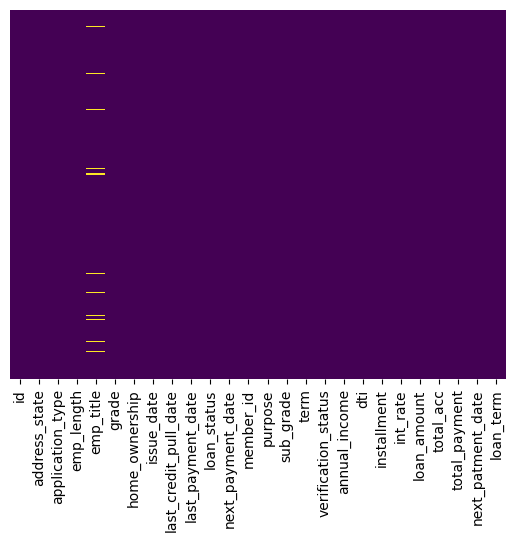

In [316]:
# Using a chart to display the missing values

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Only emp_title column have missig value.

Checking outliers and distribution of some variables

* Annual Income

(<Axes: title={'center': 'Annual Income'}, xlabel='annual_income'>,)

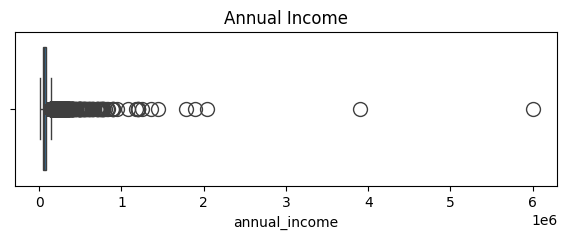

In [317]:
# Get the box plot
plt.figure(figsize = (7,2))
plt.title('Annual Income')
sns.boxplot(x=df['annual_income'], fliersize = 10),

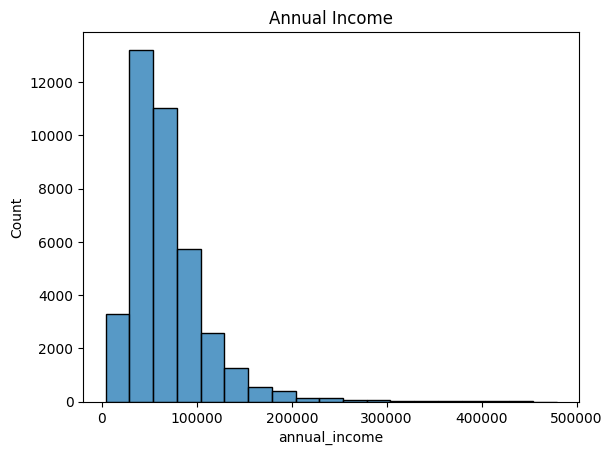

In [318]:
# Create histogram of annual_income
sns.histplot(df['annual_income'], bins=range(4000,500000,25000))
plt.title('Annual Income');


The distribution of annual income is skewed left and most annual income fall in [25000 - 100000] range

In [319]:
# Handle the outliers
percentile25 = df['annual_income'].quantile(0.25)
percentile75 = df['annual_income'].quantile(0.75)
iqr = percentile75 - percentile25
upper_threshold = percentile75 + (iqr * 1.5)
df.loc[df['annual_income'] > upper_threshold, 'annual_income'] = upper_threshold


* Det-to-Income

(<Axes: title={'center': 'Debt-to-Income'}, xlabel='dti'>,)

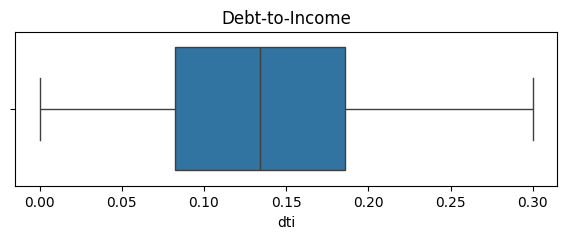

In [320]:
plt.figure(figsize = (7,2))
plt.title('Debt-to-Income')
sns.boxplot(x = df['dti'], fliersize = 10),

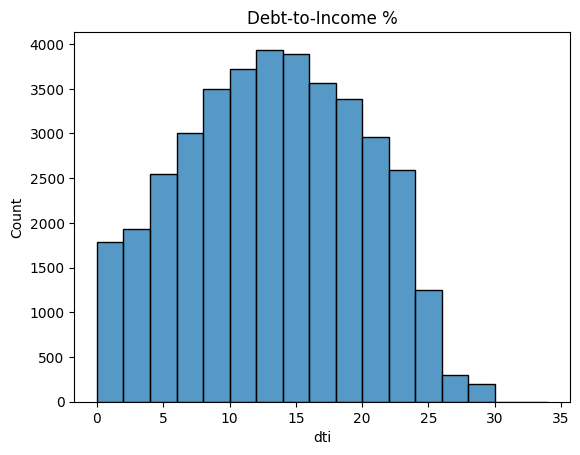

In [321]:
# Create histogram of dti
sns.histplot(df['dti']*100, bins=range(0,35,2))
plt.title('Debt-to-Income %');

dti is slightly normally distributed.

* Installment

(<Axes: title={'center': 'Installment'}, xlabel='installment'>,)

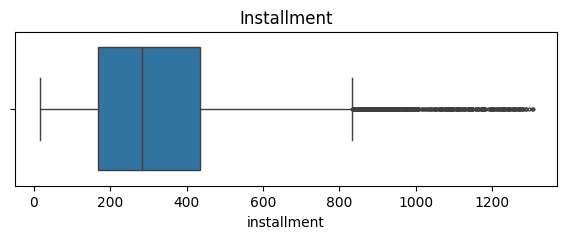

In [322]:
plt.figure(figsize = (7,2))
plt.title('Installment')
sns.boxplot(x = df['installment'], fliersize = 2),

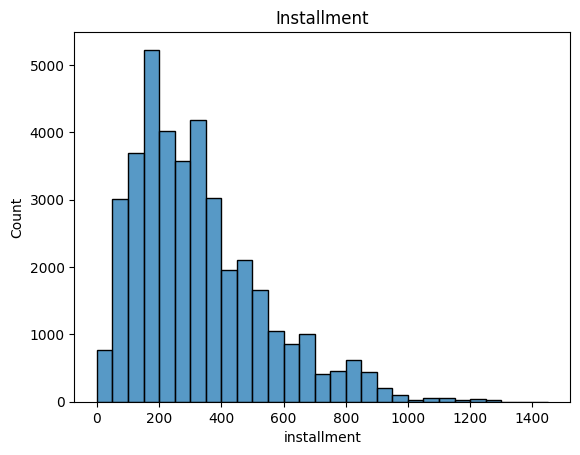

In [323]:
# Create histogram of installment
sns.histplot(df['installment'], bins=range(0,1500,50))
plt.title('Installment');

The distribution of installment is skewed left and most installment fall in [100 - 350] range

* Interet rate

(<Axes: title={'center': 'Interet Rate'}, xlabel='int_rate'>,)

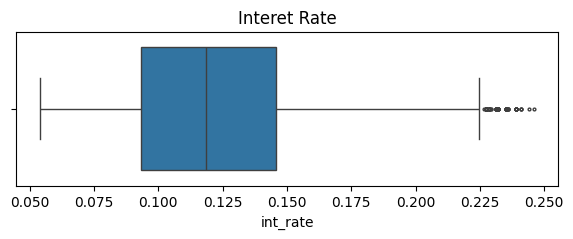

In [324]:
plt.figure(figsize = (7,2))
plt.title('Interet Rate')
sns.boxplot(x = df['int_rate'], fliersize = 2),

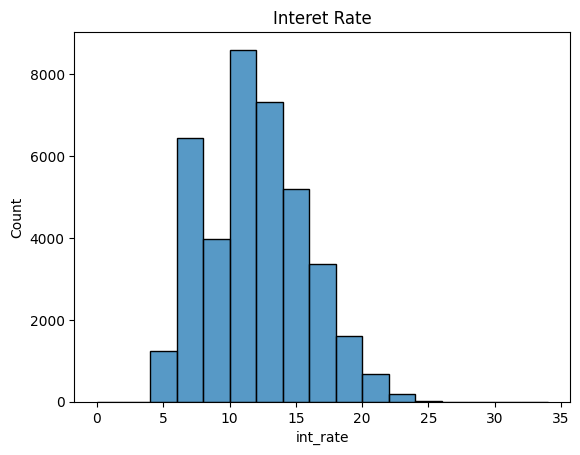

In [325]:
# Create histogram of int_rate
sns.histplot(df['int_rate']*100, bins=range(0,35,2))
plt.title('Interet Rate');

Interet rate is slightly normally distributed.

* Loan Amount

(<Axes: title={'center': 'Loan Amount'}, xlabel='loan_amount'>,)

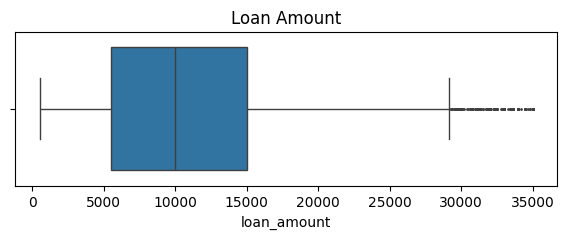

In [326]:
plt.figure(figsize = (7,2))
plt.title('Loan Amount')
sns.boxplot(x = df['loan_amount'], fliersize = 1),

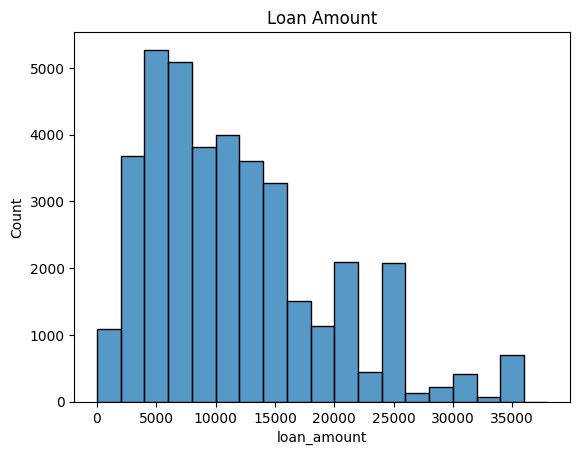

In [327]:
# Create histogram of loan_amount
sns.histplot(df['loan_amount'], bins=range(0,40000,2000))
plt.title('Loan Amount');

The loan_amount distribution is slightly skewed left.

In [328]:
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,next_patment_date,loan_term
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,2021-09-13,2021-04-13,1,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.00,0.0100,59.83,0.1527,2500,4,1009,2021-05-13,60
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,2021-12-14,2021-01-15,0,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.00,0.0535,109.43,0.1864,3000,4,3939,2021-02-15,36
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,2021-12-12,2021-01-09,1,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.00,0.2088,421.65,0.1596,12000,11,3522,2021-02-09,36
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,2021-12-12,2021-03-12,0,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.00,0.0540,97.06,0.1065,4500,9,4911,2021-04-12,60
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,2021-12-14,2021-01-15,0,15-02-2021,1302971,car,A1,36 months,Verified,83000.00,0.0231,106.53,0.0603,3500,28,3835,2021-02-15,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,2021-05-16,2021-05-16,0,16-06-2021,992381,wedding,C1,60 months,Verified,100000.00,0.1986,551.64,0.1299,24250,33,31946,2021-06-16,60
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,2021-04-16,2021-05-16,0,16-06-2021,1192039,wedding,C1,60 months,Verified,50000.00,0.0458,579.72,0.1349,25200,18,31870,2021-06-16,60
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,2021-05-16,2021-05-16,0,16-06-2021,1089898,wedding,D5,60 months,Verified,65000.00,0.1734,627.93,0.1749,25000,20,35721,2021-06-16,60
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,2021-05-16,2021-05-16,0,16-06-2021,1194971,wedding,D5,60 months,Verified,145751.25,0.0009,612.72,0.1825,24000,9,33677,2021-06-16,60


Delete some irrelevant variables

In [329]:
columns_to_drop = ['id', 'emp_title', 'member_id', 'next_payment_date', 'last_payment_date', 'issue_date', 'last_credit_pull_date', 'next_patment_date',
                  'application_type', 'installment', 'total_acc', 'term', 'total_payment' ]

In [330]:
data = df.drop(columns_to_drop, axis = 1, inplace = True)

In [331]:
df

,address_state,emp_length,grade,home_ownership,loan_status,purpose,sub_grade,verification_status,annual_income,dti,int_rate,loan_amount,loan_term
0,GA,< 1 year,C,RENT,1,car,C4,Source Verified,30000.00,0.0100,0.1527,2500,60
1,CA,9 years,E,RENT,0,car,E1,Source Verified,48000.00,0.0535,0.1864,3000,36
2,CA,4 years,C,RENT,1,car,C5,Not Verified,50000.00,0.2088,0.1596,12000,36
3,TX,< 1 year,B,MORTGAGE,0,car,B2,Source Verified,42000.00,0.0540,0.1065,4500,60
4,IL,10+ years,A,MORTGAGE,0,car,A1,Verified,83000.00,0.0231,0.0603,3500,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,NJ,< 1 year,C,MORTGAGE,0,wedding,C1,Verified,100000.00,0.1986,0.1299,24250,60
38572,NY,8 years,C,RENT,0,wedding,C1,Verified,50000.00,0.0458,0.1349,25200,60
38573,CA,5 years,D,RENT,0,wedding,D5,Verified,65000.00,0.1734,0.1749,25000,60
38574,NY,5 years,D,RENT,0,wedding,D5,Verified,145751.25,0.0009,0.1825,24000,60


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address_state        38576 non-null  object 
 1   emp_length           38576 non-null  object 
 2   grade                38576 non-null  object 
 3   home_ownership       38576 non-null  object 
 4   loan_status          38576 non-null  int64  
 5   purpose              38576 non-null  object 
 6   sub_grade            38576 non-null  object 
 7   verification_status  38576 non-null  object 
 8   annual_income        38576 non-null  float64
 9   dti                  38576 non-null  float64
 10  int_rate             38576 non-null  float64
 11  loan_amount          38576 non-null  int64  
 12  loan_term            38576 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 3.8+ MB


Convert loan_term column to numerical values

In [333]:
# Convert loan_term
df['loan_term'] = pd.to_numeric(df['loan_term'])

Plit the data into numerical and categorical values.

In [334]:
# Plitting the data into numerical and categorical values

cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
# Because Cat_data and num_data are the lists, this code will transform it into database
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [335]:
num_data

,loan_status,annual_income,dti,int_rate,loan_amount,loan_term
0,1.0,30000.00,0.0100,0.1527,2500.0,60.0
1,0.0,48000.00,0.0535,0.1864,3000.0,36.0
2,1.0,50000.00,0.2088,0.1596,12000.0,36.0
3,0.0,42000.00,0.0540,0.1065,4500.0,60.0
4,0.0,83000.00,0.0231,0.0603,3500.0,36.0
...,...,...,...,...,...,...
38571,0.0,100000.00,0.1986,0.1299,24250.0,60.0
38572,0.0,50000.00,0.0458,0.1349,25200.0,60.0
38573,0.0,65000.00,0.1734,0.1749,25000.0,60.0
38574,0.0,145751.25,0.0009,0.1825,24000.0,60.0


Encode the categorial variables

In [336]:
# Encode the  categorical variables
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

# Display the cat_data
cat_data

,address_state,emp_length,grade,home_ownership,purpose,sub_grade,verification_status
0,10,10,2,4,1,13,1
1,4,9,4,4,1,20,1
2,4,4,2,4,1,14,0
3,42,10,1,0,1,6,1
4,14,1,0,0,1,0,2
...,...,...,...,...,...,...,...
38571,30,10,2,0,13,10,2
38572,33,8,2,4,13,10,2
38573,4,5,3,4,13,19,2
38574,33,5,3,4,13,19,2


Check the Loan_Status distribution for categorical values(plit by Loan_Status)

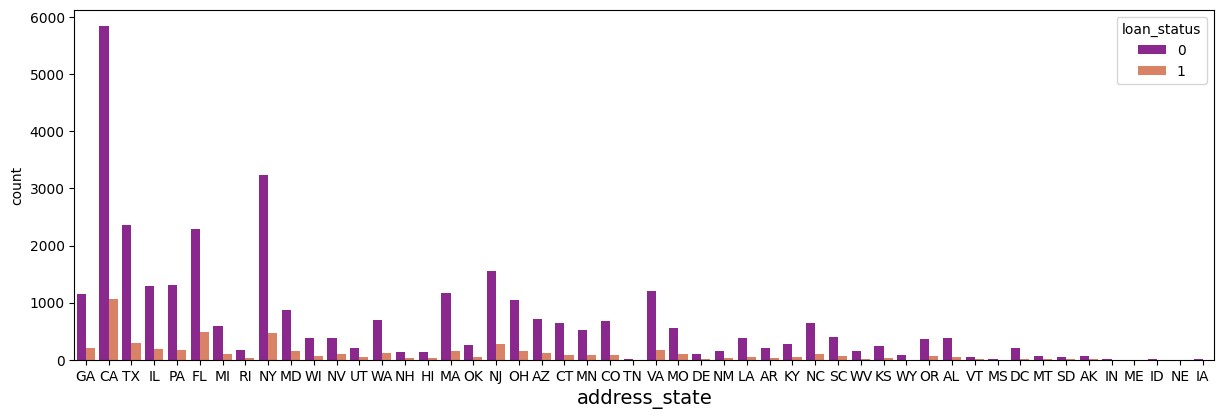

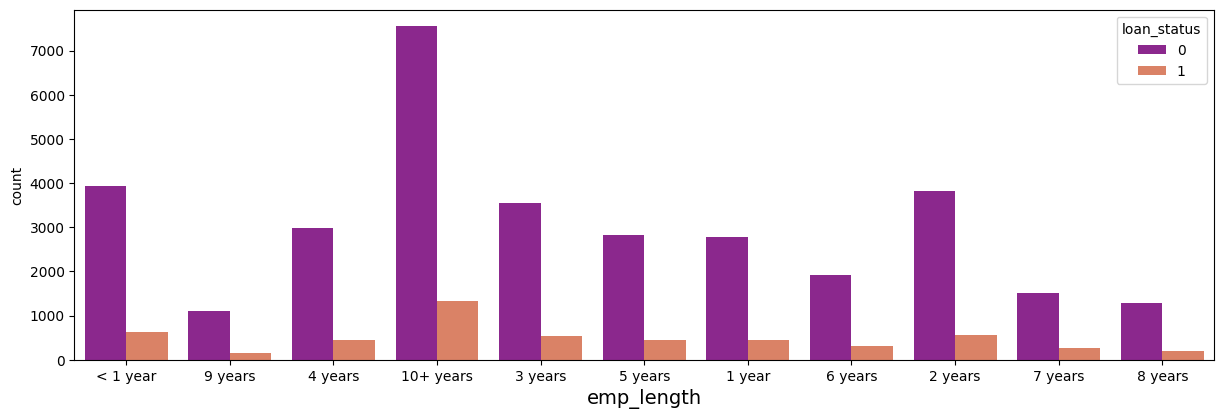

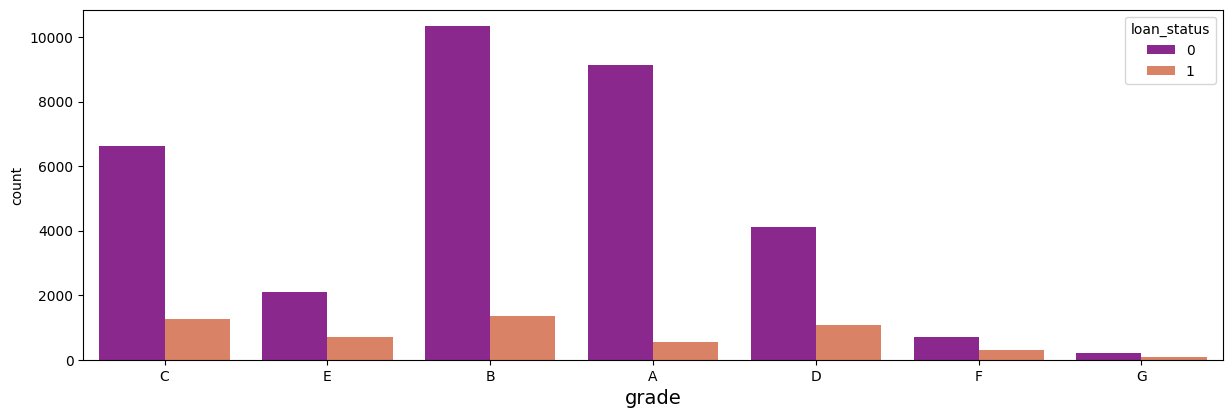

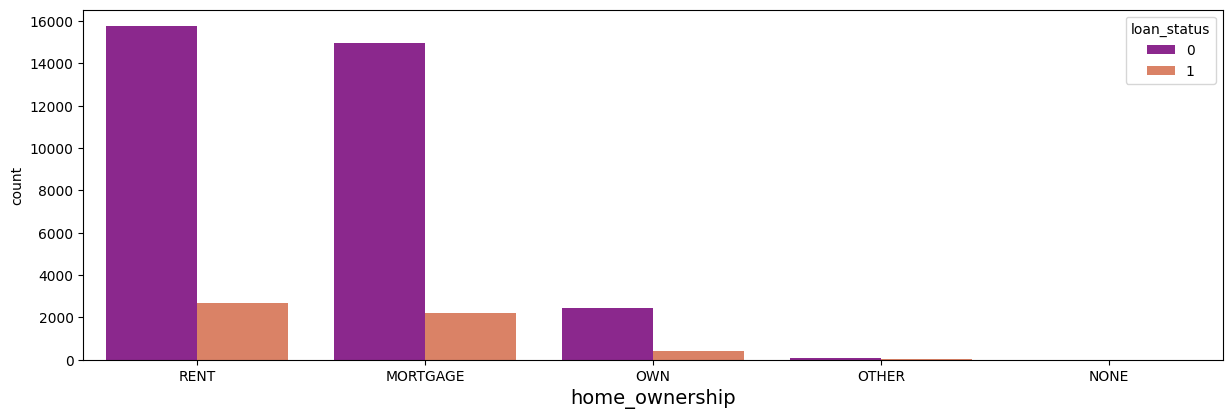

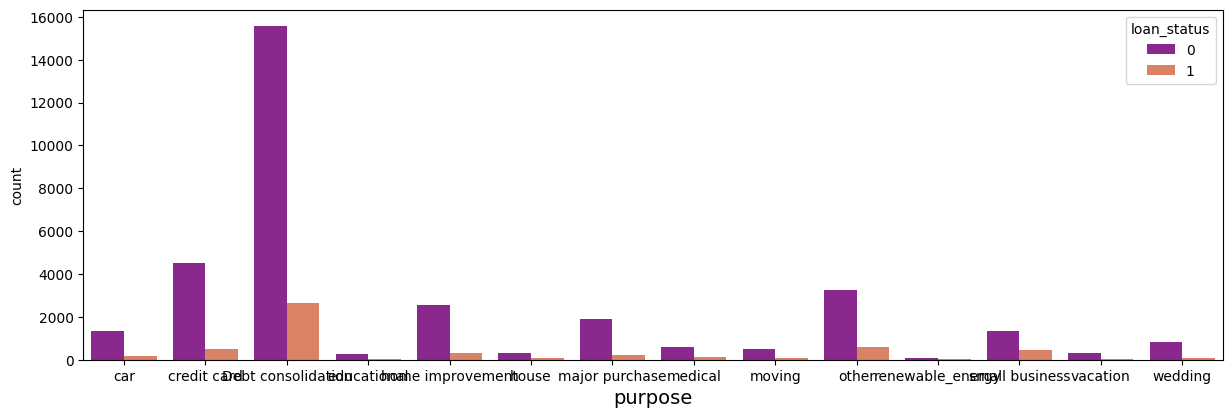

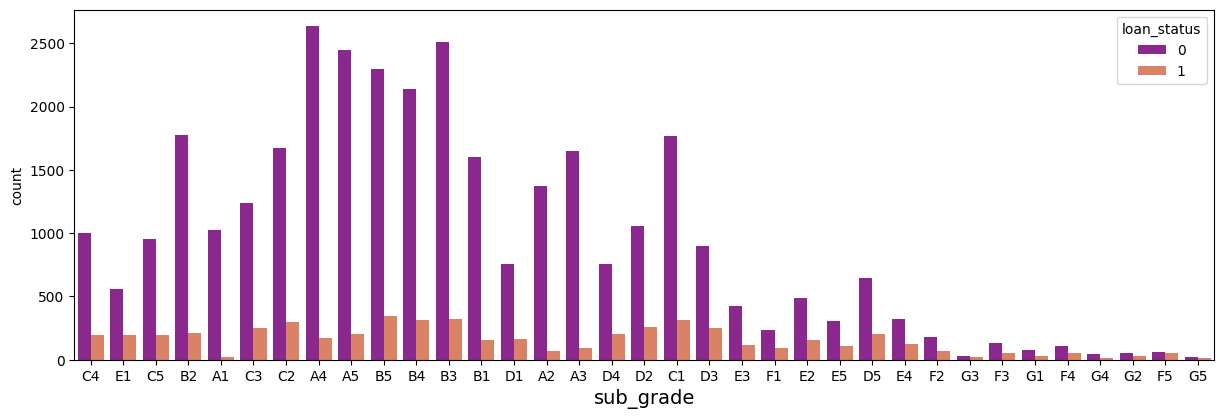

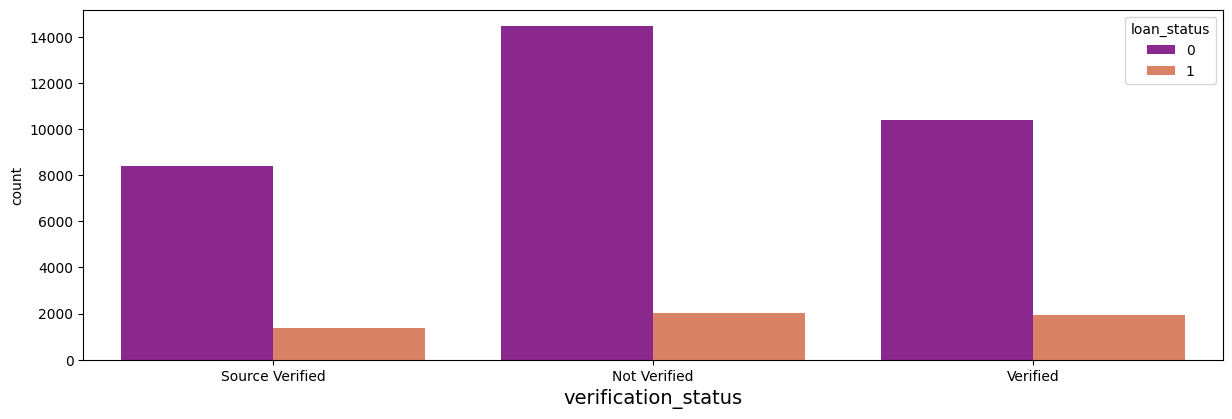

In [337]:
# Loan_Status distribution for categorical values

for i in cat_data[:-1]: 
    plt.figure(figsize=(50,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='loan_status', data= df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

Check relation between the Loan_Status and numerical columns

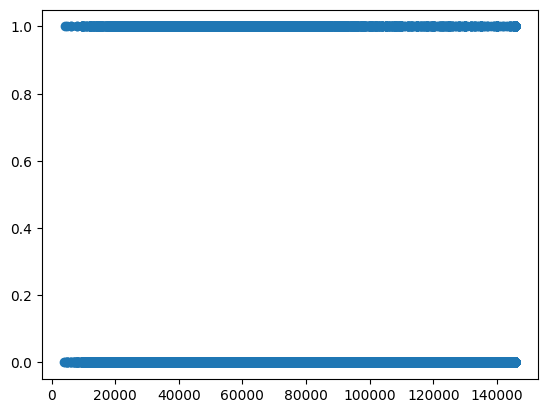

In [338]:
# Annual income and Loan_Status
plt.scatter(num_data['annual_income'], num_data['loan_status'])

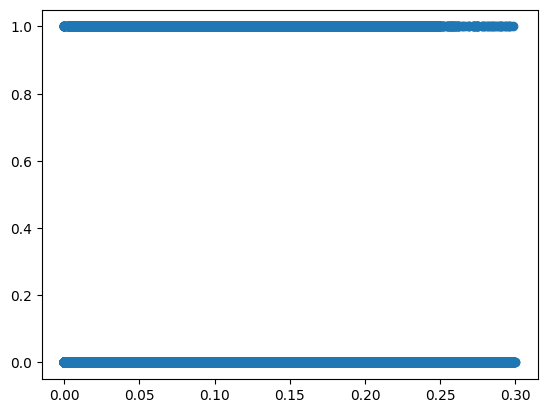

In [339]:
# dti and Loan_Status
plt.scatter(num_data['dti'], num_data['loan_status'])

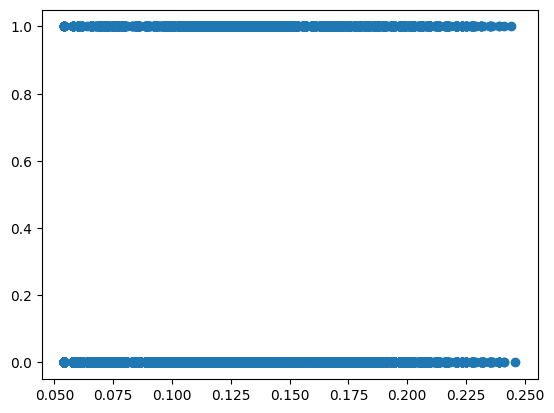

In [340]:
# Interet rate and Loan_Status
plt.scatter(num_data['int_rate'], num_data['loan_status'])

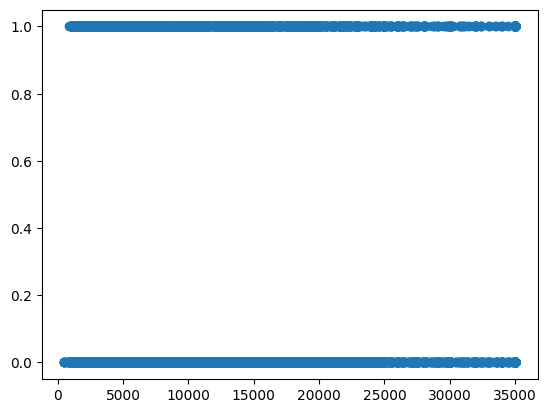

In [341]:
# Loan amount and Loan_Status
plt.scatter(num_data['loan_amount'], num_data['loan_status'])

Join numerical and categorical data and assign it to df_new

In [342]:
# Concat cat_data and num_data

df_new = pd.concat([num_data, cat_data], axis = 1)

##### Let's check the assumptions for logistic regression

1. Independent observations: Each rows are independent
2. No extreme outliers : I handled the outliers earlier
3. No multicollinearity among X predictors: Checking out this through correlation matrix and heatmap.

In [343]:
# Code a correlation matrix to help determine most correlated variables
corr = df_new.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,loan_status,annual_income,dti,int_rate,loan_amount,loan_term,address_state,emp_length,grade,home_ownership,purpose,sub_grade,verification_status
loan_status,1.000000,-0.062841,0.040696,0.197200,0.053256,0.149329,-0.023178,-0.005799,0.191358,0.022260,0.024393,0.195163,0.043082
annual_income,-0.062841,1.000000,-0.127752,0.075646,0.432017,0.081682,-0.011527,-0.067217,0.078727,-0.324204,-0.002376,0.081995,0.223347
dti,0.040696,-0.127752,1.000000,0.112978,0.065713,0.084218,0.015738,-0.020932,0.097860,0.023056,-0.162458,0.103542,0.072514
int_rate,0.197200,0.075646,0.112978,1.000000,0.308243,0.452654,-0.001602,-0.012719,0.948479,0.062847,-0.046934,0.961209,0.213564
loan_amount,0.053256,0.432017,0.065713,0.308243,1.000000,0.360273,-0.000901,-0.059863,0.288888,-0.175127,-0.158108,0.300800,0.421090
loan_term,0.149329,0.081682,0.084218,0.452654,0.360273,1.000000,0.010143,-0.037022,0.431134,-0.106841,-0.047548,0.442188,0.259644
address_state,-0.023178,-0.011527,0.015738,-0.001602,-0.000901,0.010143,1.000000,-0.006983,-0.003189,-0.041088,0.006047,-0.001618,-0.013078
emp_length,-0.005799,-0.067217,-0.020932,-0.012719,-0.059863,-0.037022,-0.006983,1.000000,-0.008896,0.073091,0.008610,-0.008806,-0.032162
grade,0.191358,0.078727,0.097860,0.948479,0.288888,0.431134,-0.003189,-0.008896,1.000000,0.052878,-0.038595,0.979638,0.195306
home_ownership,0.022260,-0.324204,0.023056,0.062847,-0.175127,-0.106841,-0.041088,0.073091,0.052878,1.000000,0.009213,0.054704,-0.082828


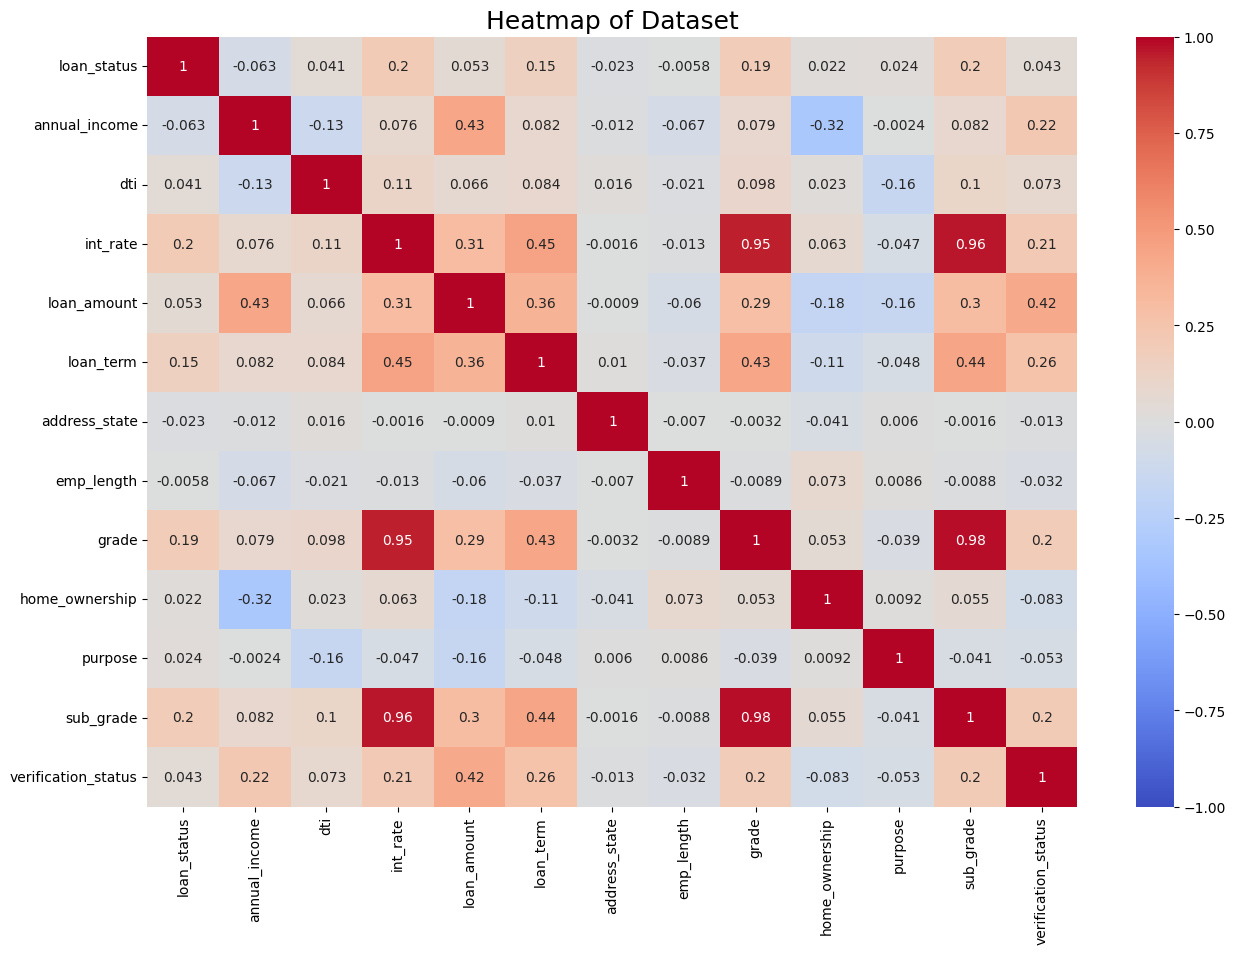

In [344]:
# Plot correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Heatmap of Dataset',fontsize=18)
plt.show();

Some variables are strongly multicollinear each other:

int_rate and grade = 0.95

int_rate and sub_grade = 0.96

grade and sub_grade = 0.98

Therefore only one of these variables should be used in our model

#### Building the model

Assigning the predictors and target variables

In [345]:
# Isolate predictor variables
X = df_new.drop(columns = ['grade', 'sub_grade', 'loan_status'])

In [346]:
# Isolate target variable
Y = df_new['loan_status']

Divide the data into train and test

Ckech the class balance

In [347]:
 # Get class balance of loan_status column
df_new['loan_status'].value_counts(normalize=True)


loan_status
0.0    0.861753
1.0    0.138247
Name: proportion, dtype: float64

Approximately 14% of the customers are classified as bad borrowers. This is an unbalanced dataset, but not extremely so it can be modeled without any class rebalancing.

Because the target class is imbalanced (86% good loan vs. 14% bad loan), we want to make
sure that we don’t get an unlucky split that over- or under-represents the frequency of the minority
class. Thus we are going to Set the function’s stratify parameter to y to ensure that the minority class appears in both
train and test sets in the same proportion that it does in the overall dataset.


In [348]:
 # Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=y, random_state=42)


 Instantiate and fit the model

In [349]:
# Instantiate the model.
LR = LogisticRegression(random_state = 42, max_iter = 400, penalty = 'l1', solver='liblinear')

# Fit the model
LR.fit(X_train, Y_train)


LogisticRegression(max_iter=400, penalty='l1', random_state=42,
                   solver='liblinear')

Get the coefficients of each variable. The coefficients represent the change in the log odds of the target variable for every one unit increase in X.

In [350]:
# Get the coefficient of each variables
pd.Series(LR.coef_[0], index=X.columns)

annual_income          -0.000010
dti                     0.530735
int_rate               12.834363
loan_amount             0.000010
loan_term               0.017577
address_state          -0.006034
emp_length             -0.011006
home_ownership          0.001439
purpose                 0.030365
verification_status    -0.016019
dtype: float64

Get the intercept of the model

In [351]:
# Get the intercept
LR.intercept_

array([-3.73876692])

Great! let's check the last assumption: Linear relationship between X and the logit of y.

In logistic regression, the relationship between a predictor variable and the dependent variable does
not need to be linear, however, the log-odds (logit) of the dependent variable with respect
to the predictor variable should be linear. Here is the formula for calculating log-odds, where p is
the probability of response:
logit(p) = ln(p/1 − p)

 Get the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a
variable called training_probabilities.


In [352]:
# Get the predicted probabilities of the training data
training_probabilities = LR.predict_proba(X_train)
training_probabilities

array([[0.55424715, 0.44575285],
       [0.8496465 , 0.1503535 ],
       [0.95406304, 0.04593696],
       ...,
       [0.95946068, 0.04053932],
       [0.9472858 , 0.0527142 ],
       [0.94856774, 0.05143226]])

This results in a 2-D array where each row represents a customer in X_train. The first column is the probability of the customer to be 
classified as good loan , and the second
column is the probability of the customer to be 
classified as bad loan.

In [353]:
# Copy the X_train dataframe and assign to logit_data
logit_data = X_train.copy()

# Create a new logit column in the logit_data df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]


Verify the linear relationship between X and the estimated log odds
(logits) by making a regplot.


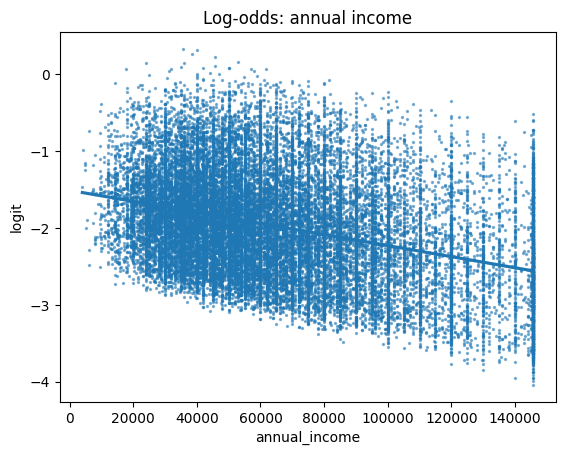

In [354]:
# Plot regplot of annual income log-odds
sns.regplot(x='annual_income', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5})
plt.title('Log-odds: annual income');


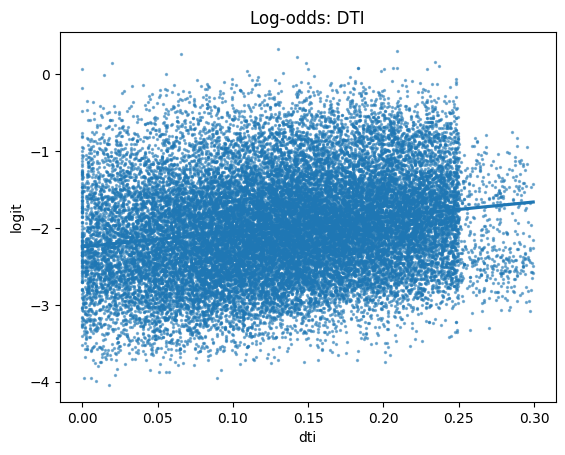

In [355]:
# Plot regplot of dti log-odds
sns.regplot(x='dti', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5})
plt.title('Log-odds: DTI');


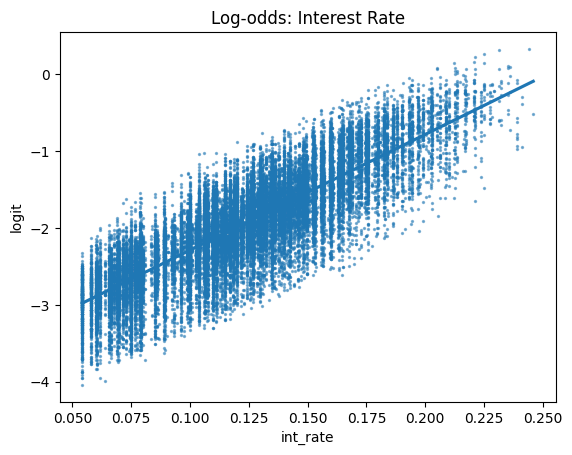

In [356]:
# Plot regplot of int_rate log-odds
sns.regplot(x='int_rate', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5})
plt.title('Log-odds: Interest Rate');

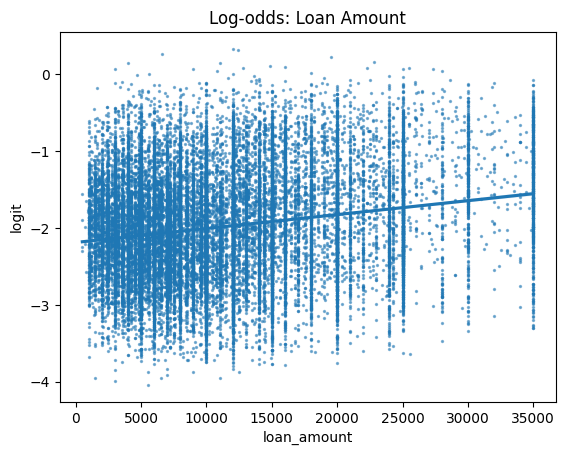

In [357]:
# Plot regplot of loan amount log-odds
sns.regplot(x='loan_amount', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5})
plt.title('Log-odds: Loan Amount');

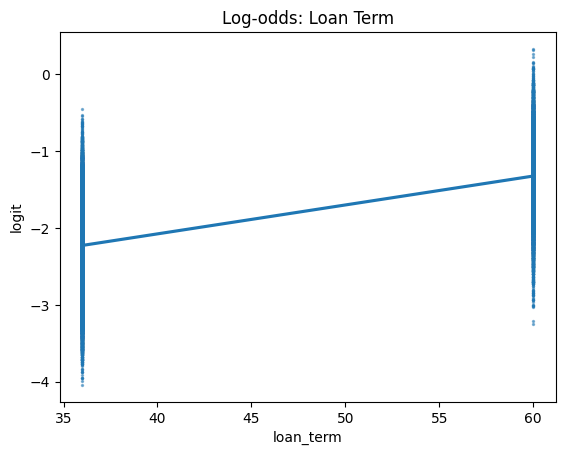

In [358]:
# Plot regplot of loan term log-odds
sns.regplot(x='loan_term', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5})
plt.title('Log-odds: Loan Term');

The interest rate is strongly linear, and the rest is slightly linear. We can say that the logistic assumptions are met. It's time to get the results and evaluate them.

In [359]:
 # Generate predictions on X_test
Y_preds = LR.predict(X_test)

In [360]:
# Create a classification report
target_labels = ['Good_Loan', 'Bad_Loan']
print(classification_report(Y_test, Y_preds, target_names=target_labels))

# Accuracy score
LR.score(X_test, Y_test)

              precision    recall  f1-score   support

   Good_Loan       0.86      1.00      0.93      8311
    Bad_Loan       0.50      0.00      0.00      1333

    accuracy                           0.86      9644
   macro avg       0.68      0.50      0.47      9644
weighted avg       0.81      0.86      0.80      9644



0.8617793446702613

Get the confusion matrix

In [361]:
# Instantiate the confusion matrix
cm = confusion_matrix(Y_test, Y_preds)


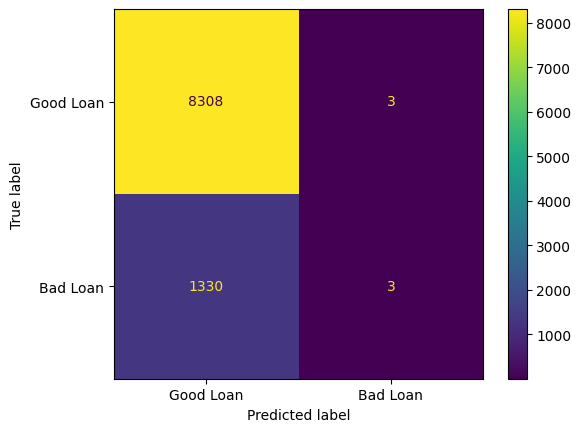

In [362]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=['Good Loan', 'Bad Loan'],
)
disp.plot();

In [363]:
 # Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision


0.5

In [364]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.002250562640660165

Get the coefficients of each variables

In [365]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, LR.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance


[('int_rate', 12.834363440029334),
 ('dti', 0.5307349543163828),
 ('purpose', 0.0303649674903919),
 ('loan_term', 0.01757706993635405),
 ('home_ownership', 0.0014385049005254324),
 ('loan_amount', 1.0011286279200804e-05),
 ('annual_income', -9.52086113779057e-06),
 ('address_state', -0.006033535982787707),
 ('emp_length', -0.011006045989793307),
 ('verification_status', -0.01601866488513211)]

C:\Users\12409\AppData\Local\Temp\ipykernel_7856\1451326568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in feature_importance],


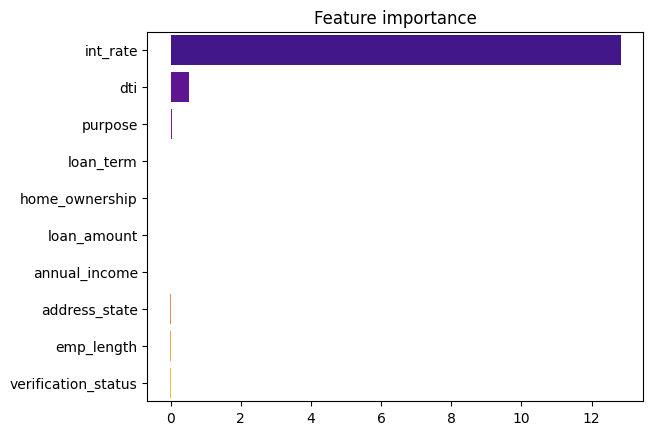

In [366]:
 # Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient = 'h',
            palette='plasma' )
plt.title('Feature importance');


#### Conclusion:

* We can't recommend using this this model. Because it has mediocre precision and No recall, which means that it always makes a 
false negative predictions and fails to capture customers who will be a bad borrower.

* Int_rate and dti are the most important features in this model. they have a positive correlation.

* To help improve the model, it would be helpful to have more information such as credit score for each customer.

#### After a week I sent the summary (You will find it within findings and insights files under the name of 3. Summary of Regression Model) of the regression model to my manager. He really appreciated it. For the next, he asked me to build machine learning that will enable us to predict whether a customer will be a good or bad borrower.

### Task 4: Machine Learning Model

In this project, I will apply the tree-based technique to predict whether a customer will be a good or bad borrower.

##### * The purpose of this model it's to find the way to generate more revenue.

##### * The goal of this model is to predict whether a customer will be a good or bad borrower.

#### 1. Ethical considerations

###### A- What are we being asked to do?

Predict if customer will be a good or bad borrower.

###### B- What are the consequences of our model making errors?

* What is the likely effect of the model when it predicts a false negative (i.e., when the model
says a customer will be a good borrower, but he actually won’t)?

* What is the likely effect of the model when it predicts a false positive (i.e., when the model
says a customer will be a bad borrower, but he actually won’t)?

If the model predicts a false negative, we are not going to ask more requirements such as large down payment and / or Co-signers with good credit history to the customer and we are going to have a non-reimbursement risk and therefore reduce the bank's turnover.

If the model predicts false positive, the bank will avoid the non-reimbursement risk, but customers could be upset due to the additional requirements and could churn.

###### C-  Do the benefits of such a model outweigh the potential problems?

The proactive measures taken by the bank might have an unintended effect on the customer. Customer might decide to leave our bank. Thus, follow-up analysis of the effectiveness is recommended.
If the measures are reasonable and effective, then the benefits will most likely outweigh the problems.


###### D- Would we proceed with the request to build this model? Why or why not?

Yes. There aren't any significant risks for building such a model.

#### 2. Feature ingineering

We have saved the data under df1 as the copy of our data (df) after checking missing and duplicates values. 


######  Missing Values 
Only emp_title column has missing values. We are going to drop this column.

######  Duplicate values
There is no duplicate values

######  Outliers

The data has some columns with outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.





In [368]:
df1

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,next_patment_date,loan_term
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,2021-09-13,2021-04-13,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,2021-05-13,60
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,2021-12-14,2021-01-15,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,2021-02-15,36
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,2021-12-12,2021-01-09,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,2021-02-09,36
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,2021-12-12,2021-03-12,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,2021-04-12,60
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,2021-12-14,2021-01-15,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,2021-02-15,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,2021-05-16,2021-05-16,Current,16-06-2021,992381,wedding,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946,2021-06-16,60
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,2021-04-16,2021-05-16,Current,16-06-2021,1192039,wedding,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870,2021-06-16,60
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,2021-05-16,2021-05-16,Current,16-06-2021,1089898,wedding,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721,2021-06-16,60
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,2021-05-16,2021-05-16,Current,16-06-2021,1194971,wedding,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677,2021-06-16,60


###### Drop irrelevant columns
Note that tree-based models can handle multicollinearity.

In [369]:
# Drop irrelevant columns

drop_columns = ['id', 'emp_title', 'member_id', 'next_payment_date', 'last_payment_date', 'issue_date', 'last_credit_pull_date', 'next_patment_date',
                  'application_type', 'installment', 'total_acc', 'term', 'total_payment' ]

df1_drop = df1.drop(drop_columns, axis = 1, inplace = True)

Convert loan_term column to interger

In [370]:
# Convert loan_term
df1['loan_term'] = pd.to_numeric(df1['loan_term'])

In [372]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address_state        38576 non-null  object 
 1   emp_length           38576 non-null  object 
 2   grade                38576 non-null  object 
 3   home_ownership       38576 non-null  object 
 4   loan_status          38576 non-null  object 
 5   purpose              38576 non-null  object 
 6   sub_grade            38576 non-null  object 
 7   verification_status  38576 non-null  object 
 8   annual_income        38576 non-null  float64
 9   dti                  38576 non-null  float64
 10  int_rate             38576 non-null  float64
 11  loan_amount          38576 non-null  int64  
 12  loan_term            38576 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 3.8+ MB


###### variables encoding

Encode the dependent variables

In [373]:
# Encode the dependent variables
df1['loan_status'] = df1['loan_status'].map({'Fully Paid': 0, 'Current' : 0, 'Charged Off': 1})

In [374]:
# Plitting the data into numerical and categorical values

cat_data = []
num_data = []
for i,c in enumerate(df1.dtypes):
    if c == object:
        cat_data.append(df1.iloc[:,i])
    else:
        num_data.append(df1.iloc[:,i])
# Because Cat_data and num_data are the lists, this code will transform it into database
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [375]:
# Encode the  categorical variables
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [376]:
# Get the categorical data
cat_data

,address_state,emp_length,grade,home_ownership,purpose,sub_grade,verification_status
0,10,10,2,4,1,13,1
1,4,9,4,4,1,20,1
2,4,4,2,4,1,14,0
3,42,10,1,0,1,6,1
4,14,1,0,0,1,0,2
...,...,...,...,...,...,...,...
38571,30,10,2,0,13,10,2
38572,33,8,2,4,13,10,2
38573,4,5,3,4,13,19,2
38574,33,5,3,4,13,19,2


In [377]:
# Get the numerical data
num_data

,loan_status,annual_income,dti,int_rate,loan_amount,loan_term
0,1.0,30000.0,0.0100,0.1527,2500.0,60.0
1,0.0,48000.0,0.0535,0.1864,3000.0,36.0
2,1.0,50000.0,0.2088,0.1596,12000.0,36.0
3,0.0,42000.0,0.0540,0.1065,4500.0,60.0
4,0.0,83000.0,0.0231,0.0603,3500.0,36.0
...,...,...,...,...,...,...
38571,0.0,100000.0,0.1986,0.1299,24250.0,60.0
38572,0.0,50000.0,0.0458,0.1349,25200.0,60.0
38573,0.0,65000.0,0.1734,0.1749,25000.0,60.0
38574,0.0,368000.0,0.0009,0.1825,24000.0,60.0


 Merge cat_data and num_data

In [378]:
# Concat cat_data and num_data and assign to a new variable df2

df2 = pd.concat([num_data, cat_data], axis = 1)

Evaluation metric:  Before modeling, we must decide on an evaluation metric.
    
Examine the class balance of our target variable.

In [379]:
 # Get class balance of loan_status column
df2['loan_status'].value_counts(normalize=True)

loan_status
0.0    0.861753
1.0    0.138247
Name: proportion, dtype: float64

This is an unbalanced dataset, but not extremely.

We have already figured out that the risks involved in making a false positive prediction are minimal. Therefore, we are going to select the model based on the recall score.

#### Modeling

Split the data

In [380]:
# Isolate target variable (y)
y= df2['loan_status']

# Isolate the features (X)
x= df2.drop('loan_status', axis=1)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

##### * RANDOM FOREST

We are going to  use GridSearchCV to tune our Random Forest model.

In [381]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
'max_features': [1.0],
'max_samples': [0.7],
'min_samples_leaf': [1],
'min_samples_split': [2],
'n_estimators': [400]
}

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')


Fitting  the model to training data.

In [382]:
%%time
rf1.fit(x_train, y_train)

CPU times: total: 2min 8s
Wall time: 5min 6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [400]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Save the model

In [383]:
# Save the Randomforest model
with open ('random_forest_model', 'wb') as f:
    pickle.dump(rf1, f)


Get the best average score accross all the validation folds

In [384]:
# Get the best score
rf1.best_score_

0.012423160027564925

Get the best combination of hyperparameters

In [385]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

Use make_results () function to get all the scores of our model

In [387]:
# Define make_function () with three arguments
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): The of model in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
    'recall': 'mean_test_recall',
    'f1': 'mean_test_f1',
    'accuracy': 'mean_test_accuracy',
    }
    # Get all the results from the CV and put them in a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the dataframe with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
    'precision': [precision],
    'recall': [recall],
    'F1': [f1],
    'accuracy': [accuracy],
    },
    )
    return table


In [388]:
# Call make_results() on the GridSearch object
results = make_results('RF CV', rf1, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.300318,0.012423,0.023811,0.859397


Aside from the accuracy, the scores aren’t good. However, recall from the logistic regression model we built in the last time was ~0.0015, which means that this model has 88% better recall and about the same accuracy.

Get the scores on the test data

In [389]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(x_test)


Use get_test_scores to get all the scores of the model on the test data

In [391]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.
    In:
    model_name (string): How the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data
    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    table = pd.DataFrame({'model': [model_name],
    'precision': [precision],
    'recall': [recall],
    'F1': [f1],
    'accuracy': [accuracy]
    })
    return table

Use get_test_scores() function to generate the scores on the test data. Assign the
results to rf_test_scores

In [392]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.300318,0.012423,0.023811,0.859397
0,RF test,0.310345,0.008435,0.016423,0.860290


Precision and accuracy have approximately the same results as it was on the validation results. However, recall and F1 declined notably.

##### * XGBOOST

In [393]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.2],
'max_depth': [6],
'min_child_weight': [5],
'n_estimators': [500]
}

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')


let's fit the model to the x_train and y_train data.

In [394]:
%%time
xgb1.fit(x_train, y_train)

CPU times: total: 31 s
Wall time: 4.59 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.2], 'max_depth': [6],
                         'min_child_weight': [5], 'n_estimators': [500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best from this model.

In [395]:
# Examine the best score
xgb1.best_score_

0.06539943058114217

Get the best parameters.

In [396]:
xgb1.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 500}

Use make_reults() function to have all the results of the model and assign it to xgb1_cv_results.

In [397]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'recall')
results = pd.concat([results, xgb1_cv_results], axis=0)
results


,model,precision,recall,F1,accuracy
0,RF CV,0.300318,0.012423,0.023811,0.859397
0,RF test,0.310345,0.008435,0.016423,0.860290
0,XGB CV,0.286900,0.065399,0.106392,0.848412


Get the score on the test data.

In [398]:
# get the score on the test data
xgb_preds = xgb1.best_estimator_.predict(x_test)

Use get_test_scores to get all the scores on the test data and assign it to xgb_test_scores.

In [399]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results


,model,precision,recall,F1,accuracy
0,RF CV,0.300318,0.012423,0.023811,0.859397
0,RF test,0.310345,0.008435,0.016423,0.860290
0,XGB CV,0.286900,0.065399,0.106392,0.848412
0,XGB test,0.280193,0.054358,0.091052,0.849922


The recall is ~ 0.046 greater than Random Forest model. Both models are not acceptable, but XGBoost model is the champion.

Plot a confusion matrix of the champion model’s predictions on the test data.

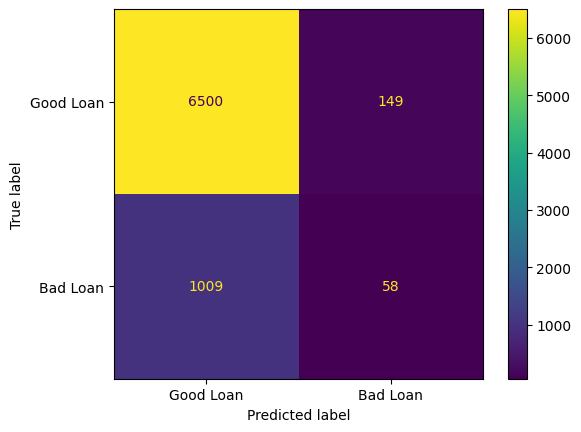

In [400]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, xgb_preds, labels=xgb1.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=['Good Loan', 'Bad Loan'],
)
disp.plot(values_format='');

In [401]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.05435801312089972

This model correctly identified only 5.44% of the customers who actually the bad borrower.

Plot the feature importances

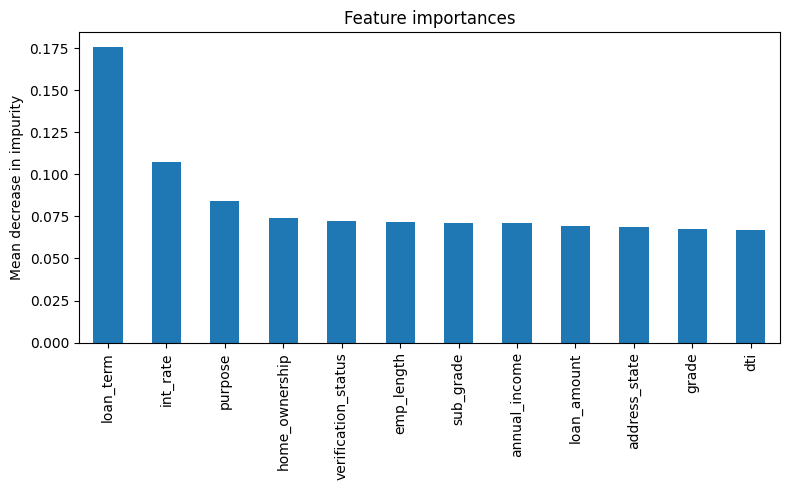

In [402]:
importances = xgb1.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=x_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)[:15]
fig, ax = plt.subplots(figsize=(8,5))
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

The most predictive feature is the loan term.

#### Conclusion

1. We wouldn’t recommend using this model, because it isn’t a strong predictor with a very low recall of 0.054.

2. To improve the performance of our model, we need to add a new feature such as credit score. This could be very helpful for the model.


#### After two weeks, I sent the summary (You will find it within findings and insights files under the name of 4. Summary of Machine learning model) of the machine Learning model to my manager. He really appreciated it. For my last task on this project, he asked me to make a presentation of the whole results of the project.

#### After 2 weeks, I presented the whole results of the project to my manager (You will find it within findings and insights files under the name of 5. 2021 Bank Loan Analysis) using power point.
